#### 线性回归任务
从给定的房屋基本信息以及房屋销售信息等，建立一个回归模型预测房屋的销售价格

In [1]:
import os
import numpy as np
import pandas as pd

np.random.seed(36)

import matplotlib
import seaborn
import matplotlib.pyplot as plot

from sklearn import datasets

In [2]:
## 读取数据
train_data = pd.read_csv(r"../../data/linear_regression_data/kc_train.csv", usecols=[0,2,3,4,5,6,7,8,9,10,11,12,13])
train_target = pd.read_csv(r"../../data/linear_regression_data/kc_train.csv", usecols=[1])
test_data = pd.read_csv(r"../../data/linear_regression_data/kc_test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20150302  9999 non-null   int64  
 1   3         9999 non-null   int64  
 2   2.25      9999 non-null   float64
 3   1670      9999 non-null   int64  
 4   6240      9999 non-null   int64  
 5   1         9999 non-null   float64
 6   8         9999 non-null   int64  
 7   1240      9999 non-null   int64  
 8   430       9999 non-null   int64  
 9   1974      9999 non-null   int64  
 10  0         9999 non-null   int64  
 11  47.6413   9999 non-null   float64
 12  -122.113  9999 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 1015.6 KB


In [4]:
#特征缩放
from sklearn.preprocessing import MinMaxScaler
minmax_scaler_train=MinMaxScaler()
minmax_scaler_train.fit(train_data) #进行内部拟合，内部参数会发生变化
scaler_train=minmax_scaler_train.transform(train_data)
scaler_train=pd.DataFrame(scaler_train,columns=train_data.columns)

minmax_scaler_test=MinMaxScaler()
minmax_scaler_test.fit(test_data)  #进行内部拟合，内部参数会发生变化
scaler_test=minmax_scaler_test.transform(test_data)
scaler_test=pd.DataFrame(scaler_test,columns=test_data.columns)

In [5]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()
#进行拟合
LR_reg.fit(scaler_train,train_target)

LinearRegression()

In [6]:
#使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error
preds=LR_reg.predict(scaler_train)           #输入数据进行预测得到结果
mse=mean_squared_error(preds,train_target)   #使用均方误差来评价模型好坏，可以输出mse进行查看评价值

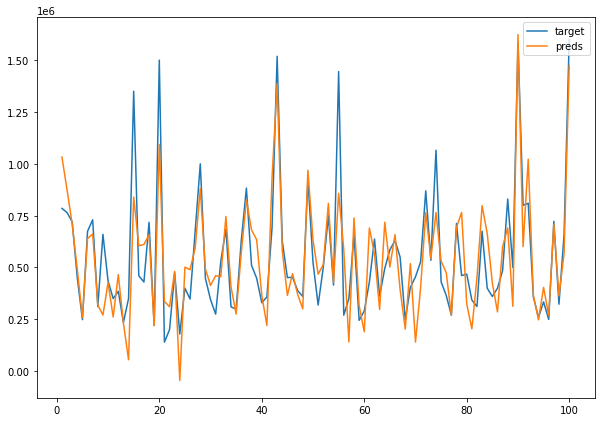

In [8]:
#绘图进行比较
plot.figure(figsize=(10,7))                         #画布大小
num=100
x=np.arange(1,num+1)                                #取100个点进行比较
plot.plot(x,train_target[:num],label='target')      #目标取值
plot.plot(x,preds[:num],label='preds')              #预测取值
plot.legend(loc='upper right')                      #线条显示位置
plot.show()

In [9]:
#输出测试数据
result=LR_reg.predict(scaler_test)
df_result=pd.DataFrame(result)
df_result.to_csv(r"../../data/linear_regression_data/test_result.csv")